<a href="https://colab.research.google.com/github/saulostopa/data-science/blob/main/Logistic-Regression/entrance-exams-for-admition-decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios programa - Regressão logística

Implemente o algoritmo gradiente descendente para regressão logística e aplique seu algoritmo para o conjunto de dados dados3.csv.



### Carregando bibliotecas principais

In [ ]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.colors import ListedColormap

## Exercicíos: Implemente as seguintes funções: `sigmoid` e `funcaoCusto`

Para facilitar, seguem algumas funções e definições matemáticas básicas que podem auxiliar no desenvolvimento. 

> Função de normalização `zscore`

<font>$$\mbox{zscore}(x^{(i)})=\frac{x^{(i)}-\mu(x^{(i)}_j)}{\sigma(x^{(i)}_j)} $$</font>

In [ ]:
#
# Calculo da normalização zscore
#
# X    = conjunto de características
# mean = média das colunas
# std  = desvio padrão das colunas
#
def zscore(X, mean=None, std=None):        
    if mean is None:
        mean = np.mean(X[:, 1:], axis=0) 
    if std is None:
        std = np.std(X[:, 1:], axis=0) 
    X[:, 1:]=(X[:, 1:]-mean)/(std)
    return (X, mean, std)

> **Exercício**: Implementar a função `sigmoid`

<font size=2>$$ \mbox{sigmoid}(z)=\frac{1}{1+e^{-z}} $$</font>

In [ ]:
#
# Função sigmóide = função logística
# 
# z = vetor de valores (nosso caso $\theta^T X$)
#
def sigmoid(z):
    out = 0

    #adicione seu código

    return out

> Função hipótese
<font size=2>$$ \mbox{hipotese}(x, \theta)=\mbox{sigmoid}(\theta^Tx) $$</font>

In [ ]:
#
# Hipótese da regressão logística
#
# X      = conjunto de características
# thetas = vetor de pesos
#
def hipotese(X, thetas):
    return sigmoid( X.dot(thetas) )

> **Exercício**: Implemente a função de custo



<font size=2>$$\mbox{funcaoCusto}(X, Y, m, \theta)=-\frac{1}{m}\sum_{i=1}^m y^{(i)}\log(\mbox{hipotese}(x^{(i)}, \theta)) + (1-y^{(i)})\log(1-\mbox{hipotese}(x^{(i)}, \theta)) $$</font> 

In [ ]:
#
# Função custo
#
# X      = conjunto de características
# Y      = rótulos
# m      = quantidade de linhas de X
# thetas = vetor de pesos
#
def funcaoCusto(X, Y, m, thetas):
    custo = 0
    
    # adicione seu código

    return custo
    

> Teste sua implementação com o código abaixo

In [ ]:
# conjunto de dados
X =  np.array([
       [ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853]
      ])

Y = np.array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.])
thetas = np.array([1.20754844, 4.00008645, 3.41594561])

print("Para esses dados sua função precisa ter a resposta:", 0.1417129370388809)
print("Saida da sua função:", funcaoCusto(X, Y, 10, thetas))

> Função `mapPolAll` para transformar as características em polinomias.

In [ ]:
#
# Mapeamento de um par de características (x_i, x_j) 
#
# X = conjunto de características
# i = índice da característica x_i
# j = índice da característica x_j
# d = grau do polinômio
#
def mapPol(X, i, j, d):
    x1 = X[:, i]
    x2 = X[:, j]
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1)
    Xnew = np.empty((x1.size, 0))
    for n in range(2, d+1):    
        for m in range(n+1):
            Xnew = np.append(Xnew,x1**(n-m)*x2**m,axis=1)
    return np.c_[X, Xnew]

# 
# Mapeia todo os pares do conjunto X para um polinômio de dado grau d
#
# X = conjunto de características
# d = grau do polinômio
#
def mapPolAll(X, d):
    if(d <= 1):
        return X
    l = np.size(X, 1)
    for i in range(1, l-1):
        for j in range(i+1, l):
            X = mapPol(X, i, j, d)
    return X

> Função para calcular a derivada da função de custo. 
<font size=2>$$\mbox{derivadaFunçãoCusto}(X, Y, m,\theta)=\frac{1}{m}\sum_{i=1}^m(\mbox{hipotese}(x^{(i)})-y^{(i)})x_j^{(i)} $$</font>

In [ ]:
#
# Derivada da função custo
#
# X      = conjunto de características
# Y      = rótulos
# m      = quantidade de linhas de X
# thetas = vetor de pesos
#
def derivadaDaFuncaoCusto(X, Y, m, thetas):
    h = hipotese(X, thetas)  
    return (h-Y).dot(X)/m

> Algoritmo do gradiente descendente (método estocástico). Note que, a regra de atualização é idêntica a  da regressão linear. <br><br>

| <br>&nbsp;&nbsp;&nbsp;&nbsp; SGD (Gradiente Descendente Estocástico) &nbsp;&nbsp;&nbsp;&nbsp; <br><br> |
| ----- |
| <br>&nbsp;&nbsp; $\textbf{for } k = 1 : \text{ Número_Epocas}$ <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{for } j = 0 : n $<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\text{Temp}_j = \theta_j - \alpha  \dfrac{\partial}{\partial \theta_j} J(\theta)$ <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\textbf{end}$ <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \theta=\text{Temp} $<br> &nbsp;&nbsp; $\textbf{end}$  <br><br> |
| |

onde $ x^{(i)} \in \mathbb{R}^n $ e $ y^{(i)} \in \{0, 1\} $.

In [ ]:
#
# Algoritmo do Gradiente Descendente Estocastico (SGD)
#
# X         = conjunto de características
# Y         = rótulos
# m         = quantidade de linhas de X
# numEpocas = número de épocas
# alpha     = taxa de aprendizagem
#
def gradienteDescendente(X, Y, m, numEpocas, alpha):
    n = np.size(X, 1)        
    thetas = np.zeros(n)    
    #thetas = np.random.normal(loc=0, scale=0.01, size=n)    
    J_historico = []
    
    for iteracao in range(numEpocas):        
        thetas = thetas - alpha * derivadaDaFuncaoCusto(X, Y, m, thetas)
        J_historico = J_historico + [funcaoCusto(X, Y, m, thetas)]
    
    return [thetas, J_historico]


> Função para realizar a predição
$$ \mbox{predição}(x, \theta) =\left\{ \begin{array}{cc}1, &\text{se } \mbox{hipotese}(x, \theta)\geq 0.5 \\ 0,&\text{caso contrário}\hspace{1.5cm} \end{array}\right. $$

In [ ]:
#
# Predição
#
# X = conjunto de características
# thetas = vetor de pesos
#
def predicao(X, thetas):
    return np.where(hipotese(X, thetas) >= 0.5, 1, 0)      

> Função para plotar a fronteira de decisão em 2D

In [ ]:

#
# Plota fronteira de decisão em 2D
#
# x1               = Característica 1
# x2               = Característica 2
# Y                = rótulos
# thetas           = vetor de pesos
# preProcessamento = uma função para transformar os dados, ex: normalizar ou elevar
#                    características
# resolution       = resolução (incremento para construir o grid, valores muito baixos
#                         podem gastar muita mémoria)
#
def plotDecisionRegions(x1, 
                        x2, 
                        Y, 
                        thetas, 
                        preProcessamento, 
                        resolution=0.05):
    
    classes = np.unique(Y)    
    markers = ("s", "x", "o", "^", "v", "^", "h", "H")
    colors = ("red", "blue", "lightgreen", "gray", "cyan", "green", "yellow", "pink")
    cmap = ListedColormap(colors[:len(np.unique(Y))])
        
    # plot the decision surface
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
        
    zz = np.array([np.ones(np.size(xx1)), xx1.ravel(), xx2.ravel()]).T       
    Z = predicao(preProcessamento(zz), thetas)    
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.sort(np.unique(Y))):
        plt.scatter(x=x1[Y == cl], 
                    y=x2[Y == cl],
                    alpha=0.8,
                    marker=markers[idx], label=classes[idx],
                    edgecolor="black")

#
# Calcula matriz de confusão binária
#
#             (conhecido)
#               p    n
#  (predito) p [tp  fp]
#            n [fn  tn]
#
#  X      = conjunto de características
#  Y      = rótulos
#  thetas = vetor de pesos
#
def binaryConfusionMatrix(X, Y, thetas):
    p = predicao(X, thetas)
    
    pos = np.where(Y == 1)
    neg = np.where(Y == 0)
    
    tp = np.size(np.where(p[pos] == 1))
    fp = np.size(np.where(p[pos] == 0))
    
    tn = np.size(np.where(p[neg] == 0))
    fn = np.size(np.where(p[neg] == 1))
    
    return np.array([[tp, fp], [fn, tn]])

#
# Calcula acurácia do classificador utilizando
#
#  X      = conjunto de características
#  Y      = rótulos
#  thetas = vetor de pesos
#
def acuracia(X, Y, thetas):
    M = binaryConfusionMatrix(X, Y, thetas)
    return 100 * (M.diagonal().sum()/M.sum())

# Procedimento principal

### Carregando os dados

In [ ]:
!wget "https://www.dropbox.com/s/efaqmq9iyx2topn/dados3.csv"

--2021-10-07 18:32:14--  https://www.dropbox.com/s/efaqmq9iyx2topn/dados3.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/efaqmq9iyx2topn/dados3.csv [following]
--2021-10-07 18:32:14--  https://www.dropbox.com/s/raw/efaqmq9iyx2topn/dados3.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucadbc8ae255ab5f45c29ea2c852.dl.dropboxusercontent.com/cd/0/inline/BXl7fkKgPMaKOhkNNAevrqDWG5luS_xs7OsKav-FLAMzgoJchoQl-vYnJVEUj20tB0YRL3oZTc0ci0CWmz-s4F1EPgM9PAbRIk2FEpSyykm4YMpNhyXIrTUtvNiBW72BZde8n_OmF_iTAmplhMtthr_Z/file# [following]
--2021-10-07 18:32:14--  https://ucadbc8ae255ab5f45c29ea2c852.dl.dropboxusercontent.com/cd/0/inline/BXl7fkKgPMaKOhkNNAevrqDWG5luS_xs7OsKav-FLAMzgoJchoQl-vYnJVEUj20tB0YRL3oZTc0ci0CWmz-s4F1EPgM9PAbR

> Função para separar os dados em dois conjuntos: **treinamento** e **teste**

In [ ]:
# Função para separar os dados em dois conjuntos: treinamento e teste
def train_test_split(data, test_size=0.3):       
  np.random.shuffle(data.values)
  limiar = int((len(dados)+1) * (1 - test_size)) 
  train_data = data[ : limiar] 
  test_data = data[limiar : ]
  
  X_train = train_data.values[:, 0:-1]
  Y_train = train_data.values[:, -1]

  X_test = test_data.values[:, 0:-1]
  Y_test = test_data.values[:, -1]

  return X_train, X_test, Y_train, Y_test



## Procedimentos para o treinamento do algoritmo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Acuracia no conjunto de treinamento: 100.0


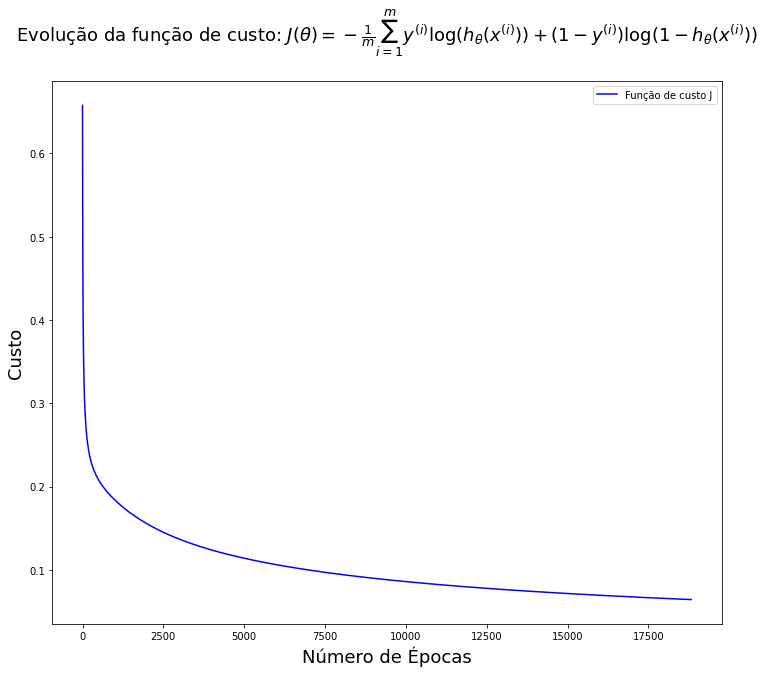

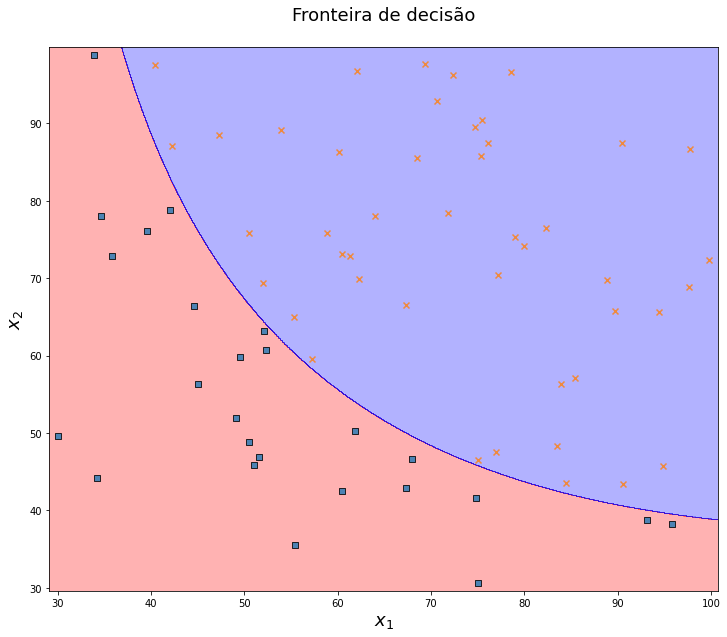

In [ ]:
# carregando arquivos de dados
dados = pd.read_csv("dados3.csv", sep=',', header=None, dtype=np.float64)

# conjunto de dados
X_train, X_test, Y_train, Y_test = train_test_split(dados)
m_train = np.size(X_train, 0)
m_test = np.size(X_test, 0)

# adicionando o bias
X_train = np.c_[ np.ones(m_train), X_train ] 
X_test = np.c_[ np.ones(m_test), X_test ] 

# Normalizando os dados e mapeamento polinomial
grauPolinomio = 2
X_train_poly = mapPolAll(np.copy(X_train), grauPolinomio) #mapeamento polinomial
X_test_poly = mapPolAll(np.copy(X_test), grauPolinomio) #mapeamento polinomial
[X_train_poly, mean, std] = zscore(X_train_poly)
[X_test_poly, mean, std] = zscore(X_test_poly, mean, std) #note que aqui estamos usando a mesma média e desvio padrão dos dados de treinamento


#########################################
# Executando o gradiente descendente 
#####=#####Encontre os parâmetros########
taxa_de_aprendizado = 0.1
numEpocas = 60000
(thetas, J_historico) = gradienteDescendente(X_train_poly, Y_train, m_train, numEpocas, taxa_de_aprendizado)
#########################################


##Impressoes
print('Acuracia no conjunto de treinamento:', acuracia(X_train_poly, Y_train, thetas))


# Plotando evolução do custo 
plt.figure(figsize=(12,10))
plt.plot(range(numEpocas), J_historico, color='blue', label=r'Função de custo J')
plt.xlabel(r'Número de Épocas', fontsize=18)
plt.ylabel(r'Custo', fontsize=18)
plt.title(r'Evolução da função de custo: $J(\theta)=-\frac{1}{m}\sum_{i=1}^m y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)})) $'+'\n', 
          fontsize=18)
plt.legend()
plt.show()



# Plotando fronteira de decisão
# função de pré processamento necessária
def preProcessamento(X, mean=mean, std=std, d=grauPolinomio):
    X = mapPolAll(X, d=d)
    [X, _, _] = zscore(X, mean, std)
    return X

plt.figure(figsize=(12,10))
plt.title(r'Fronteira de decisão'+ '\n', fontsize=18)
plotDecisionRegions(X_train[:, 1], X_train[:, 2], Y_train, thetas, preProcessamento)
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$x_2$', fontsize=18);



## Procedimentos para avaliação do classificador com o conjunto de teste

Acuracia no conjunto de teste: 100.0


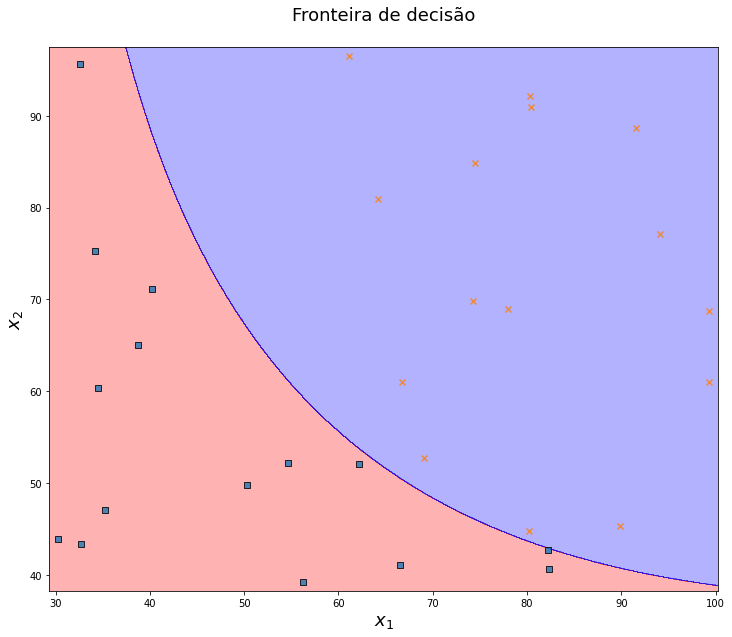

In [ ]:
##Impressoes
print('Acuracia no conjunto de teste:', acuracia(X_test_poly, Y_test, thetas))

plt.figure(figsize=(12,10))
plt.title(r'Fronteira de decisão'+ '\n', fontsize=18)
plotDecisionRegions(X_test[:, 1], X_test[:, 2], Y_test, thetas, preProcessamento)
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$x_2$', fontsize=18);